In [2]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
import seaborn as sns
from sklearn import datasets
from sklearn import manifold
from skimage.io import imshow

In [3]:
data_csv='../datasets/wine.csv'

In [4]:
data=pd.read_csv(data_csv)

In [5]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
data.quality.unique()

array([5, 6, 7, 4, 8, 3])

In [12]:
qualities=np.sort(data.quality.unique())

In [14]:
{x:count for count,x in enumerate(qualities)}

{3: 0, 4: 1, 5: 2, 6: 3, 7: 4, 8: 5}

In [15]:
quality_mapping={x:count for count,x in enumerate(qualities)}

In [16]:
data.quality=data.quality.map(quality_mapping)

In [17]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,2
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2


In [19]:
data.shape

(1599, 12)

In [20]:
from sklearn import model_selection

In [27]:
data_train, data_test  = model_selection.train_test_split(data,random_state=42,test_size=0.2,train_size=0.8,shuffle=True)

In [31]:
data_train=data_train.reset_index(drop=True)

In [32]:
data_test=data_test.reset_index(drop=True)

In [33]:
data_test.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.7,0.56,0.08,2.50,0.114,14.0,46.0,0.9971,3.24,0.66,9.6,3
1,7.8,0.50,0.17,1.60,0.082,21.0,102.0,0.9960,3.39,0.48,9.5,2
2,10.7,0.67,0.22,2.70,0.107,17.0,34.0,1.0004,3.28,0.98,9.9,3
3,8.5,0.46,0.31,2.25,0.078,32.0,58.0,0.9980,3.33,0.54,9.8,2
4,6.7,0.46,0.24,1.70,0.077,18.0,34.0,0.9948,3.39,0.60,10.6,3


In [34]:
from sklearn import tree 
from sklearn import metrics

In [90]:
clf = tree.DecisionTreeClassifier(max_depth=5)

In [91]:
cols=list(data.columns[:-1])

Train on the training set

In [92]:
clf.fit(data_train[cols],data_train.quality)

DecisionTreeClassifier(max_depth=5)

In [93]:
train_predictions=clf.predict(data_train[cols])

Predict for the test data

In [94]:
test_predictions=clf.predict(data_test[cols])

In [95]:
train_accuracy=metrics.accuracy_score(data_train.quality,train_predictions)

In [96]:
train_accuracy

0.6724003127443315

In [97]:
test_accuracy=metrics.accuracy_score(data_test.quality,test_predictions)

In [98]:
test_accuracy

0.559375

So accuracy of the model in the test in not good. Model has not generalized well.

Increasing `max_depth` to 7

In [99]:
clf = tree.DecisionTreeClassifier(max_depth=7)
clf.fit(data_train[cols],data_train.quality)
train_predictions=clf.predict(data_train[cols])
test_predictions=clf.predict(data_test[cols])
train_accuracy=metrics.accuracy_score(data_train.quality,train_predictions)
test_accuracy=metrics.accuracy_score(data_test.quality,test_predictions)
train_accuracy,test_accuracy

(0.7568412822517592, 0.553125)

Do a loop over many depths

In [110]:
result=[[0,0.5,0.5]]
for depth in range(1,30):
    clf = tree.DecisionTreeClassifier(max_depth=depth)
    clf.fit(data_train[cols],data_train.quality)
    train_predictions=clf.predict(data_train[cols])
    test_predictions=clf.predict(data_test[cols])
    train_accuracy=metrics.accuracy_score(data_train.quality,train_predictions)
    test_accuracy=metrics.accuracy_score(data_test.quality,test_predictions)
    result.append([depth,train_accuracy,test_accuracy])
result=np.array(result)

In [111]:
result[:10]

array([[0.        , 0.5       , 0.5       ],
       [1.        , 0.55903049, 0.53125   ],
       [2.        , 0.55903049, 0.53125   ],
       [3.        , 0.58639562, 0.528125  ],
       [4.        , 0.63565285, 0.53125   ],
       [5.        , 0.67240031, 0.559375  ],
       [6.        , 0.71071149, 0.53125   ],
       [7.        , 0.75684128, 0.559375  ],
       [8.        , 0.80766224, 0.546875  ],
       [9.        , 0.84362783, 0.565625  ]])

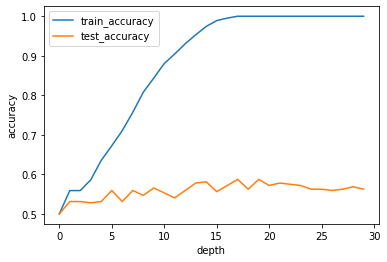

In [112]:
plt.plot(result[:,0],result[:,1],label='train_accuracy')
plt.plot(result[:,0],result[:,2],label='test_accuracy')
plt.xlabel("depth")
plt.ylabel("accuracy")
plt.legend()
plt.show()

This is overfitting, and the model has not generalized well for unseen data.